In [ ]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflecting Tables into SQLAlchemy ORM

In [ ]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import desc

In [ ]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [ ]:
# reflecting an existing database into a new model
Base = automap_base()

# reflecting the tables
Base.prepare(engine, reflect = True)

# Viewing all the classes that automap found
Base.classes.keys()

In [ ]:
# Saving references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Creating our session (link) from Python to the DB
session = Session(engine)

In [7]:
# revealing the column names with inspect()
inspector = inspect(engine)
inspector.get_table_names()
measurement_columns = inspector.get_columns('measurement')
station_columns = inspector.get_columns('station')

In [8]:
for c in measurement_columns:
    print(c['name'], c['type'])

In [9]:
for c in station_columns:
    print(c['name'], c['type'])

# Exploratory Climate Analysis

In [10]:
# Designing a query to retrieve the last 12 months of precipitation data and plotting the results 

# Calculating the date 1 year ago from the last data point in the database

prev_year = dt.date(2017,8,23)- dt.timedelta(days=365)

# Performing a query to retrieve the data and precipitation scores

date_prcp = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= prev_year).all()

#Saving the query results as a Pandas DataFrame, 
# sorting the valuesby date, and setting the index to the date column

date_prcp_df = pd.DataFrame(date_prcp, columns = ["Date", "Precipitation"])
date_prcp_df = date_prcp_df.sort_values("Date")
date_prcp_df.set_index(date_prcp_df["Date"], inplace = True)

In [11]:
# Illustrating the DateFrame 
date_prcp_df.head()

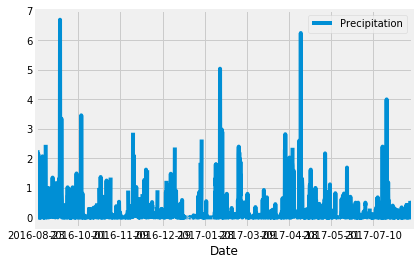

In [29]:
# plotting the results from the DataFrame
date_prcp_df.plot(x_compat = True)
plt.savefig("Images\Percepitation.png")
plt.show()

In [13]:
# Calculating the summary statistics for percipitation data with Pandas
date_prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# Designing a query to calculate the total number of stations and their names

# Names
station_names = session.query(Measurement.station).distinct().all()

# amount
staion_amount = session.query(Measurement.station).distinct().count()

In [15]:
# Designing a query to calculate the most active stations
active_stations = session.query(Measurement.station, func.count(Measurement.station).\
                    label("Most Active Stations")).\
                    group_by(Measurement.station).\
                    order_by(desc("Most Active Stations")).all()

In [16]:
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Designing a query to retrieve the last 12 months of temperature observation data (tobs)

temp_count = session.query(Measurement.station, func.count(Measurement.tobs).\
                label("TObs Count")).\
                filter(Measurement.date > prev_year).\
                group_by(Measurement.station).\
                order_by(desc("TObs Count")).all()

In [18]:
temp_count

[('USC00519397', 360),
 ('USC00519281', 351),
 ('USC00516128', 348),
 ('USC00513117', 342),
 ('USC00519523', 336),
 ('USC00514830', 304),
 ('USC00517948', 182)]

In [19]:
# retrieving the station name with the highest tobs
(name_station, station_max) = temp_count[0]
station_max

360

In [20]:
# filtering by the station with the highest tobs
station_temp = session.query((Measurement.tobs).label("Max_TObs")).\
                filter(Measurement.date > prev_year).\
                filter(Measurement.station == name_station).all()

In [21]:
# finding the length of the query
len(station_temp)

360

In [22]:
# Creatinga list to change the date type from object to float

station_temp_list = [x for x in station_temp]

In [23]:
station_temp_df = pd.DataFrame(station_temp_list)
station_temp_df.Max_TObs.dtype

dtype('float64')

In [24]:
station_temp_df.head()

,Max_TObs
0,79.0
1,80.0
2,79.0
3,77.0
4,78.0


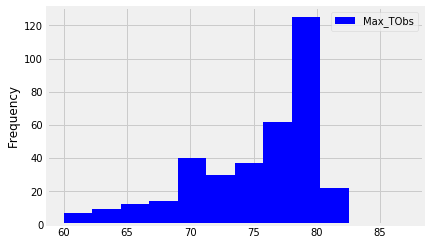

In [30]:
station_temp_df.plot.hist( facecolor='blue', bins = 12)
plt.savefig("Images\TObs v. Frequency Histogram.png")
plt.show()

In [26]:
# Creating a list of dictionaries with the Date as the Key and the prcp as the value

date_prcp_query = session.query(Measurement.date, Measurement.prcp).all()
prcp_list = []
for date, prcp in date_prcp:
    prcp_dict = {}
    prcp_dict[date] = prcp
    prcp_list.append(prcp_dict)

In [27]:
# Creating a list of dictionaries with the Station Name as the value
# Already created a query for this above titled 'station_names'

station_list = []
for station in station_names:
    station_dict = {}
    station_dict["Station Name"] = station
    station_list.append(station_dict)

In [28]:
# Creating a list of dictionaries with the TObs as the value
# Query for the dates and temperature observations from a year from the last data point.
date_tobs_query = session.query(Measurement.date, Measurement.tobs).\
                filter(Measurement.date == prev_year).all()
tobs_list = []
for tobs in date_tobs_query:
    tobs_dict = {}
    tobs_dict["TObs"] = tobs
    tobs_list.append(tobs_dict)